In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
stats.chisqrob = lambda chisq, df:stats.chi2.sf(chisq, df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import boxcox, probplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import shap
import lime
shap.initjs()
sns.set()


# **MODEL TRAINING AND TESTING**

# DATA LOADING

In [74]:
data= pd.read_csv('output.csv')
data.head()

,age,bmi,children,log_charges,sex_female,sex_male,smoker_no,smoker_yes,region_Gauteng,region_KZN,region_North-West,region_Western Cape
0,19.0,27.900,0,9.734176,1,0,0,1,1,0,0,0
1,18.0,33.770,1,7.453301,0,1,1,0,0,0,0,1
2,28.0,33.000,3,8.400538,0,1,1,0,0,0,0,1
3,33.0,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32.0,28.880,0,8.260198,0,1,1,0,0,1,0,0


# MODEL SELECTION
1. STATS MODEL
2. LINEAR REGRESSION
3. DECISION TREE REGRESSOR
4. RANDOM FOREST REGRESSOR
5. GRADI BOOSTING REGRESSOR
6. SVR 

# FEATURES ENGINEERING & SELECTION
- involve feature to be removed or added
- dummy varuable or one hot encoding
- scaling and transformation

## STATS MODEL

### Defining the input and output variables

In [75]:
X= data.drop(columns=['log_charges'])
Y= data['log_charges']

In [76]:
x=sm.add_constant(X)
model= sm.OLS(Y,x).fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     548.0
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:05:49   Log-Likelihood:                -805.77
No. Observations:                1337   AIC:                             1630.
Df Residuals:                    1328   BIC:                             1676.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.4153      0.032    108.211      0.000       3.353       3.477
age                     0.0345      0.001     39.592      0.000       0.033       0.036
bmi                     0.0134      0.002      6.361      0.000       0.009       0.017
children                0.1017      0.010     10.085      0.000       0.082       0.122
sex_female              1.7447      0.020     88.435      0.000       1.706       1.783
sex_male                1.6706      0.020     82.931      0.000       1.631       1.710
smoker_no               0.9327      0.021     45.077      0.000       0.892       0.973
smoker_yes              2.4827      0.023    108.142      0.000       2.438       2.528
region_Gauteng          0.8123      0.023     35.686      0.000       0.768       0.857
region_KZN              0.8785      0.022     39.778      0.000       0.835       0.922
region_North-West       0.9410      0.022     42.812      0.000       0.898       0.984
region_Western Cape     0.7836      0.024     32.374      0.000       0.736       0.831
==============================================================================
Omnibus:                      465.211   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1682.984
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                       7.344   Cond. No.                     4.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
# Get the predicted values
yhat = model.predict(x)


In [79]:
yhat = np.exp(yhat)


In [80]:
Y = np.exp(Y)


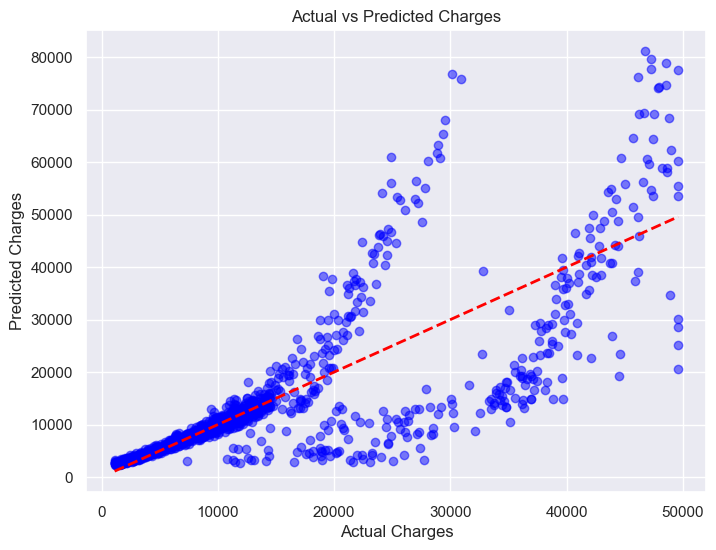

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(Y, yhat, color='blue', alpha=0.5)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', lw=2) 
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

**INTERPRETATION**

### **yhat = intercept + age.x1 +  sex.x2+  bmi.x3+  children.x4 +  smoker.x5 +  region.x6**

**significant level= 0.05 default**

**Null Hypothesis (H₀)**: There is no significant relationship between the dependent variable (charges) and the independent variables (age, region, etc.).

**Alternative Hypothesis (H₁)**: There is a significant relationship between the dependent variable (charges) and the independent variables (age, region, etc.).

At a 95% confidence level, the null hypothesis is rejected for all independent variables because their associated p-values are less than 0.05. Since these p-values are below the significance level of 0.05, we conclude that there is sufficient evidence to suggest a significant relationship between each independent variable and the dependent variable.


**R² (Coefficient of Determination)**:
R² tells us the proportion of the total variation in the dependent variable (charges) that is explained by the independent variables (such as age, region, etc.) in the model. In this case, the R² value of 77% indicates that 77% of the total variation in charges can be explained by the independent variables included in the model.

**Adjusted R²**:
Adjusted R² adjusts the R² value to account for the number of predictors in the model, providing a more accurate measure when comparing models with different numbers of predictors. In our case, the Adjusted R² is also 77%, which suggests that, after accounting for the number of predictors, the model still explains 77% of the variation in charges.

While R² indicates the overall fit of the model, Adjusted R² helps ensure that the model's explanatory power isn't artificially inflated by the inclusion of too many predictors.

**Interpretation of the coefficients**
1. Age- keeping constant other indipendent variables, them age increase by 1 year, the charges is expected to increase by 0.03 units
2. BMI- keeping constant other indipendent variables, when bmi increase by 1 unit, the charges is expected to increase by 0.01 units
3. Children- keeping constant other indipendent variables, when children increase by 1, the charges is expected to increase by 0.10 units
4. Smoker- keeping constant other indipendent variables, when smoker is yes, the charges is expected to increase by 0.93 units 1.17.2x10^04 units
5. Smoker- keeping constant other indipendent variables, when is not yes, the charges is expected to increase by 2.48 units
6. Region- keeping constant other indipendent variables, when region changes, the charges is expected to increase by 1019 units for each region (as the coefficient for each region is the same)....


## LINEAR REGRESSION


In [82]:
data


,age,bmi,children,log_charges,sex_female,sex_male,smoker_no,smoker_yes,region_Gauteng,region_KZN,region_North-West,region_Western Cape
0,19.0,27.900,0,9.734176,1,0,0,1,1,0,0,0
1,18.0,33.770,1,7.453301,0,1,1,0,0,0,0,1
2,28.0,33.000,3,8.400538,0,1,1,0,0,0,0,1
3,33.0,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32.0,28.880,0,8.260198,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50.0,30.970,3,9.268661,0,1,1,0,0,1,0,0
1333,18.0,31.920,0,7.698927,1,0,1,0,0,0,1,0
1334,18.0,36.850,0,7.396231,1,0,1,0,0,0,0,1
1335,21.0,25.800,0,7.604870,1,0,1,0,1,0,0,0


In [83]:
input= data.drop('log_charges', axis=1)
target=data['log_charges']

In [84]:
input
target

0        9.734176
1        7.453301
2        8.400538
3        9.998092
4        8.260198
          ...    
1332     9.268661
1333     7.698927
1334     7.396231
1335     7.604870
1336    10.279914
Name: log_charges, Length: 1337, dtype: float64

### Scaling and transformation

In [85]:
scaler= StandardScaler()
scaler.fit(input)
scaled_data = scaler.transform(input)

In [86]:
scaled_data

array([[-1.44041773, -0.45372318, -0.90923416, ..., -0.5655458 ,
        -0.5655458 , -0.61163774],
       [-1.51164747,  0.51248478, -0.07944162, ..., -0.5655458 ,
        -0.5655458 ,  1.63495472],
       [-0.79935006,  0.385742  ,  1.58014347, ..., -0.5655458 ,
        -0.5655458 ,  1.63495472],
       ...,
       [-1.51164747,  1.0194559 , -0.90923416, ..., -0.5655458 ,
        -0.5655458 ,  1.63495472],
       [-1.29795825, -0.79938531, -0.90923416, ..., -0.5655458 ,
        -0.5655458 , -0.61163774],
       [ 1.55123139, -0.26113999, -0.90923416, ...,  1.76820338,
        -0.5655458 , -0.61163774]])

# TRAINING AND TESTING

In [87]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

print(f"Train size: {x_train.shape}, Test size: {x_test.shape}")

Train size: (1069, 11), Test size: (268, 11)


In [88]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [89]:
predictions = model.predict(x_test)


#### Evaluation

In [90]:
model.score(x_train, y_train)

0.7491422726511427

In [91]:
model.score(x_test, y_test)

0.8265974941089762

In [92]:
intercepts = model.intercept_
print(f"Intercepts: {intercepts}")

Intercepts: 9.117215126743252


In [93]:
coefficients= pd.DataFrame(model.coef_)
coefficients

,0
0,4.814598e-01
1,7.409995e-02
2,1.240405e-01
3,2.700172e+12
4,2.700172e+12
5,6.156805e+11
6,6.156805e+11
7,-2.264372e+13
8,-2.262003e+13
9,-2.262003e+13


In [94]:
df_pf = pd.DataFrame(np.exp(predictions), columns=['Prediction'])
df_pf.head()

,Prediction
0,7582.675440
1,6021.867022
2,14277.410426
3,30107.440917
4,5482.972318


In [95]:
df_pf['target'] =np.exp(y_test)
df_pf

,Prediction,target
0,7582.675440,NaN
1,6021.867022,NaN
2,14277.410426,NaN
3,30107.440917,NaN
4,5482.972318,NaN
...,...,...
263,14221.748078,NaN
264,14138.661179,NaN
265,4635.196522,46151.12
266,64741.171757,NaN


In [96]:
y_test = y_test.reset_index(drop=True)
y_test.head

<bound method NDFrame.head of 0       9.069797
1       8.649776
2       9.344586
3      10.564792
4       8.403624
         ...    
263     9.534676
264     9.538723
265     8.275315
266    10.766459
267     9.051892
Name: log_charges, Length: 268, dtype: float64>

In [97]:
df_pf['target'] =np.exp(y_test)
df_pf

,Prediction,target
0,7582.675440,8688.86
1,6021.867022,5708.87
2,14277.410426,11436.74
3,30107.440917,38746.36
4,5482.972318,4463.21
...,...,...
263,14221.748078,13831.12
264,14138.661179,13887.20
265,4635.196522,3925.76
266,64741.171757,47403.88


In [98]:
df_pf['Residuals'] = df_pf['target']-df_pf['Prediction']
df_pf

,Prediction,target,Residuals
0,7582.675440,8688.86,1106.184560
1,6021.867022,5708.87,-312.997022
2,14277.410426,11436.74,-2840.670426
3,30107.440917,38746.36,8638.919083
4,5482.972318,4463.21,-1019.762318
...,...,...,...
263,14221.748078,13831.12,-390.628078
264,14138.661179,13887.20,-251.461179
265,4635.196522,3925.76,-709.436522
266,64741.171757,47403.88,-17337.291757


In [99]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['target']*100)
df_pf

,Prediction,target,Residuals,Difference%
0,7582.675440,8688.86,1106.184560,12.731067
1,6021.867022,5708.87,-312.997022,5.482644
2,14277.410426,11436.74,-2840.670426,24.838113
3,30107.440917,38746.36,8638.919083,22.296079
4,5482.972318,4463.21,-1019.762318,22.848181
...,...,...,...,...
263,14221.748078,13831.12,-390.628078,2.824269
264,14138.661179,13887.20,-251.461179,1.810741
265,4635.196522,3925.76,-709.436522,18.071317
266,64741.171757,47403.88,-17337.291757,36.573571


In [100]:
predictions = np.exp(predictions)


In [101]:
predictions[1:10]

array([ 6021.86702187, 14277.41042616, 30107.44091736,  5482.97231826,
       10065.05197247, 22949.31234234,  3075.6687207 ,  7823.37539612,
       11184.601573  ])

In [102]:
linear_target= np.exp(y_test)
linear_target

0       8688.86
1       5708.87
2      11436.74
3      38746.36
4       4463.21
         ...   
263    13831.12
264    13887.20
265     3925.76
266    47403.88
267     8534.67
Name: log_charges, Length: 268, dtype: float64

In [103]:
residuals= linear_target-predictions
residuals

0       1106.184560
1       -312.997022
2      -2840.670426
3       8638.919083
4      -1019.762318
           ...     
263     -390.628078
264     -251.461179
265     -709.436522
266   -17337.291757
267      680.674778
Name: log_charges, Length: 268, dtype: float64

In [104]:
coefficients = model.coef_
print(f"Coefficients for each output: {coefficients}")

Coefficients for each output: [ 4.81459774e-01  7.40999472e-02  1.24040520e-01  2.70017154e+12
  2.70017154e+12  6.15680531e+11  6.15680531e+11 -2.26437228e+13
 -2.26200271e+13 -2.26200271e+13 -2.34975728e+13]


In [105]:
mse = mean_squared_error(linear_target, predictions)  # Mean Squared Error
r2 = r2_score(linear_target, predictions)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 53202545.377592206
R-squared Score: 0.6937420384417637


### Checking residuals assumptions

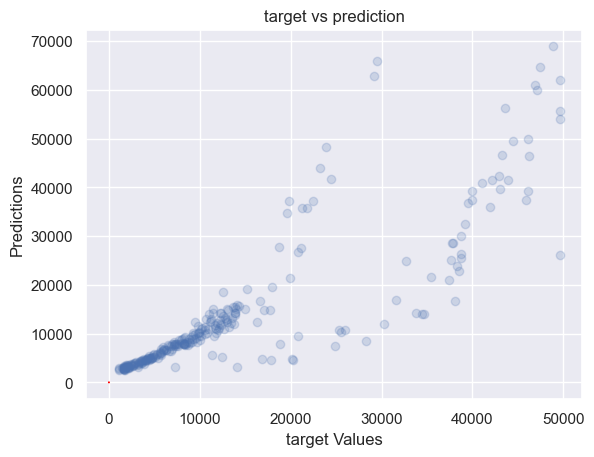

In [106]:
plt.scatter(linear_target,predictions, alpha=0.2)
plt.plot([min(target), max(target)], [min(target), max(target)], color='red')
plt.xlabel('target Values')
plt.ylabel('Predictions')
plt.title('target vs prediction')
plt.show()

The model performs well for low to mid-range charges but struggles with extreme values

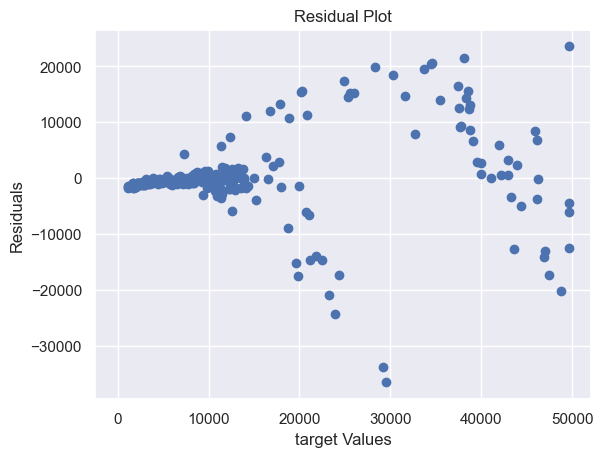

In [107]:
plt.scatter(linear_target, residuals)
plt.hlines(0, min(target), max(target), colors='red', linestyles='dashed')
plt.xlabel('target Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


For lower target values (below ~10,000), residuals appear to cluster tightly around zero, indicating good predictions in this range.
For higher target values (above ~30,000), there’s a clear pattern with larger residuals, suggesting the model systematically underestimates or overestimates in this range.

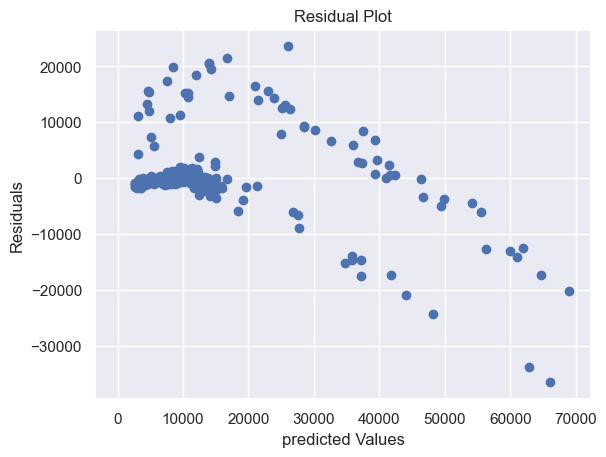

In [108]:
plt.scatter(predictions, residuals)
plt.hlines(0, min(target), max(target), colors='red', linestyles='dashed')
plt.xlabel('predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat}')


A Durbin-Watson statistic close to 2 indicates no autocorrelation.
Values below 2.0 mean there is positive autocorrelation and above 2.0 indicate negative autocorrelation


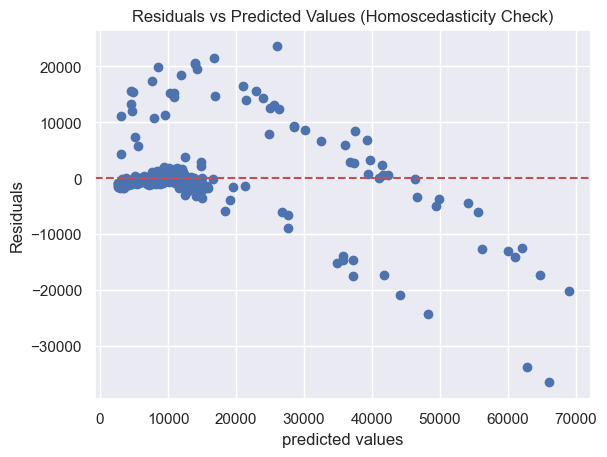

In [109]:
# tell us about residuals constant variance
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.show()

# The scatterplot below shows a typical fitted value vs. residual plot in which heteroscedasticity is present. Notice how the residuals become much more spread out as the fitted values get larger. 

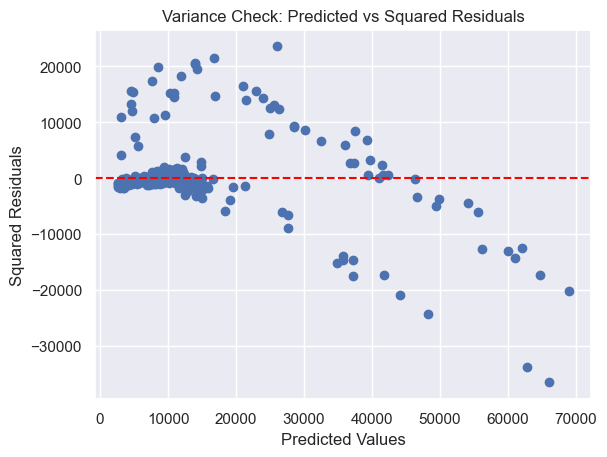

In [110]:
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Squared Residuals")
plt.title("Variance Check: Predicted vs Squared Residuals")
plt.show()


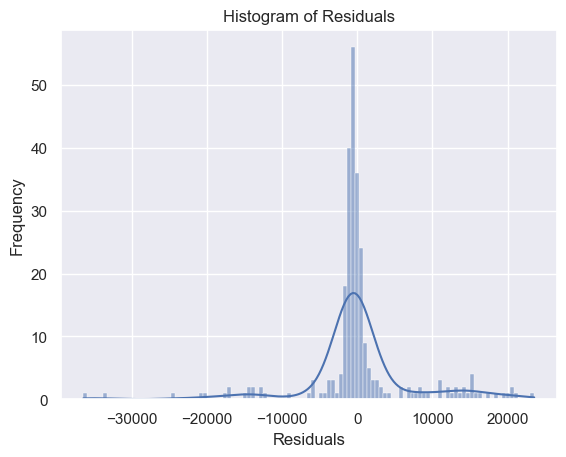

In [111]:
# Normality check histogram
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

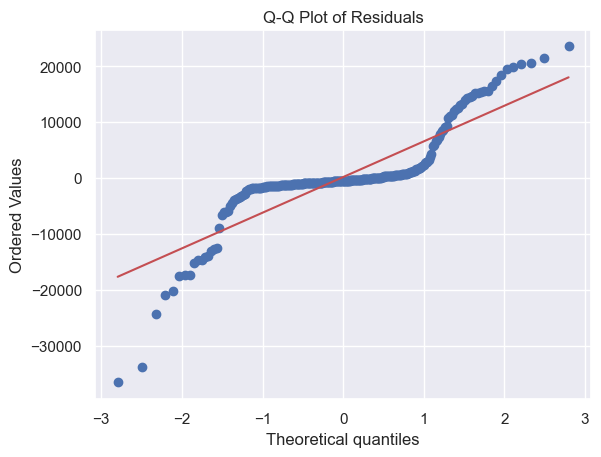

In [112]:
# Q-Q plot normality check
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

## TRAINING USING OTHER ALGORITHMS

In [113]:
input= data.drop('log_charges', axis=1)
target=data['log_charges']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

print(f"Train size: {x_train.shape}, Test size: {x_test.shape}")

Train size: (1069, 11), Test size: (268, 11)


### Decision Tree Regressor

In [115]:
tree_model = DecisionTreeRegressor()

tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [116]:
tree_pred=tree_model.predict(x_test)
mse_tree = mean_squared_error(y_test, tree_pred)
r2_tree = r2_score(y_test, tree_pred)

In [117]:
print("mse_tree", " : ", mse_tree)
print("r2_tree", " : ", r2_tree)

mse_tree  :  0.2748001689003537
r2_tree  :  0.7013571445728741


### Random Forest Regressor


In [118]:
# Train a Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [119]:
forest_pred=forest_model.predict(x_test)
mse_forest= mean_squared_error (y_test, forest_pred)
r2_forest= mean_squared_error (y_test, forest_pred)

print("mse_forest", " : ", mse_forest)

print("r2_forest", " : ", r2_forest)

mse_forest  :  0.13850447092634738
r2_forest  :  0.13850447092634738


#### XGBoost Regressor


In [120]:
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [121]:
xgb_pred = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, xgb_pred)
r2_xgb = mean_squared_error(y_test, xgb_pred)

print("mse_xgb", " : ", mse_xgb)

print("r2_xgb", " : ", r2_xgb)

mse_xgb  :  0.17863477447959322
r2_xgb  :  0.17863477447959322


#### Support Vector Regressor (SVR)


In [122]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)

SVR()

In [123]:
svr_pred = svr_model.predict(x_test)
mse_svm = mean_squared_error(y_test, svr_pred)

r2_svm = mean_squared_error(y_test, svr_pred)

print("mse_svm", " : ", mse_svm)

print("r2_svm", " : ", r2_svm)

mse_svm  :  0.5315313669731894
r2_svm  :  0.5315313669731894


### The Decision Tree model was selected due to its low Mean Squared Error (MSE), demonstrating its effectiveness in minimizing prediction errors

In [124]:
tree_pred[0:20]

array([ 9.14434265,  8.41836242,  9.26866117, 10.49675086,  8.30847509,
        9.10255358, 10.53168146,  7.67524897,  8.94033055,  9.23692972,
        9.51902729, 10.11323862, 10.55621552,  9.50828411,  8.5464704 ,
        9.05017514,  7.76736137, 10.59922862,  8.25522305,  8.33111178])

In [125]:
y_test

899      9.069797
1063     8.649776
1255     9.344586
298     10.564792
237      8.403624
          ...    
534      9.534676
542      9.538723
759      8.275315
1283    10.766459
1284     9.051892
Name: log_charges, Length: 268, dtype: float64

In [126]:
mse1= mean_squared_error(y_test, tree_pred)
mse1

0.2748001689003537

In [127]:
r2= r2_score(y_test, tree_pred)
r2

0.7013571445728741

In [128]:
tree_pred= np.exp(tree_pred)

In [129]:
tree_target= np.exp(y_test)
tree_target

899      8688.86
1063     5708.87
1255    11436.74
298     38746.36
237      4463.21
          ...   
534     13831.12
542     13887.20
759      3925.76
1283    47403.88
1284     8534.67
Name: log_charges, Length: 268, dtype: float64

In [130]:
print(tree_target.shape)
print(tree_pred.shape)

(268,)
(268,)


In [131]:
tree_residuals= tree_target - tree_pred
tree_residuals

899     -672.47
1063    1179.39
1255     836.19
298     2548.66
237      405.09
         ...   
534    -1070.40
542      -94.65
759      532.40
1283   -1113.68
1284      92.00
Name: log_charges, Length: 268, dtype: float64

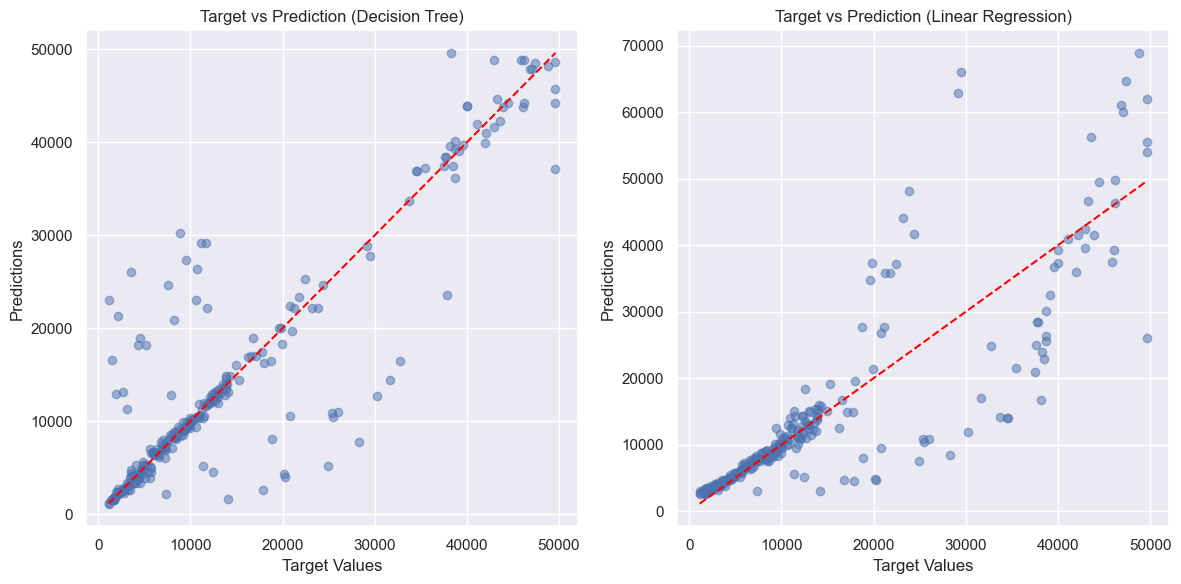

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

# Scatter plot for Decision Tree predictions
axes[0].scatter(tree_target, tree_pred, alpha=0.5)  
axes[0].plot([min(tree_target), max(tree_target)], [min(tree_target), max(tree_target)], color='red', linestyle='--')
axes[0].set_xlabel('Target Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('Target vs Prediction (Decision Tree)')

# Scatter plot for Linear Regression predictions
axes[1].scatter(linear_target, predictions, alpha=0.5) 
axes[1].plot([min(linear_target), max(linear_target)], [min(linear_target), max(linear_target)], color='red', linestyle='--')
axes[1].set_xlabel('Target Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('Target vs Prediction (Linear Regression)')

plt.tight_layout()  
plt.show()

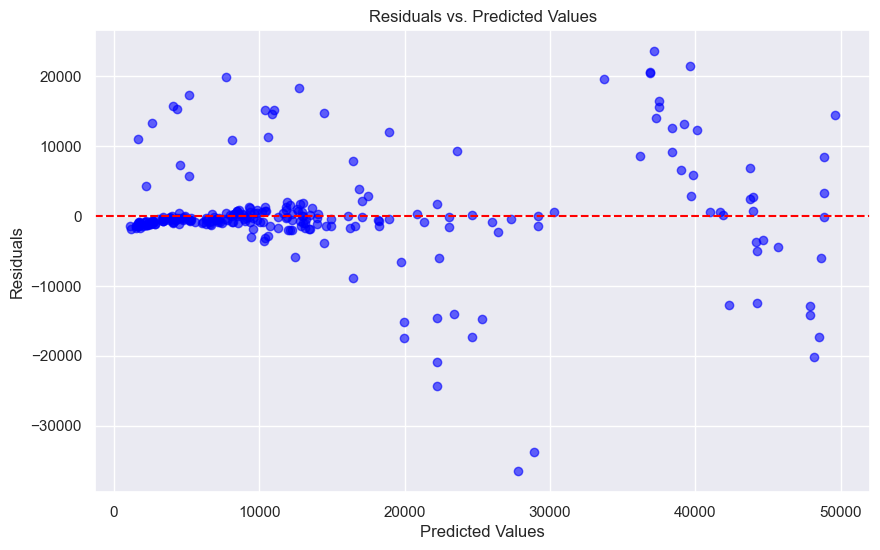

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(tree_pred, residuals, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

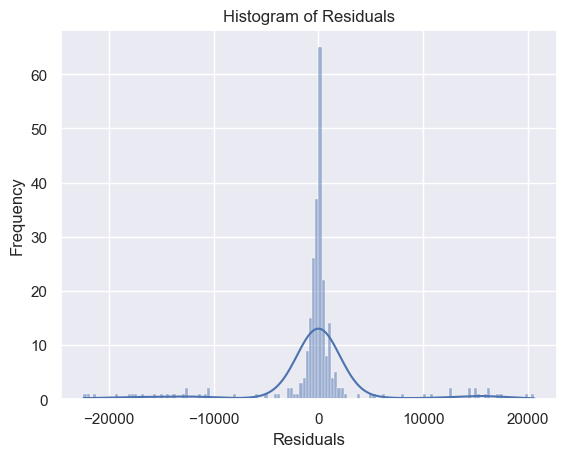

In [134]:
sns.histplot(tree_residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

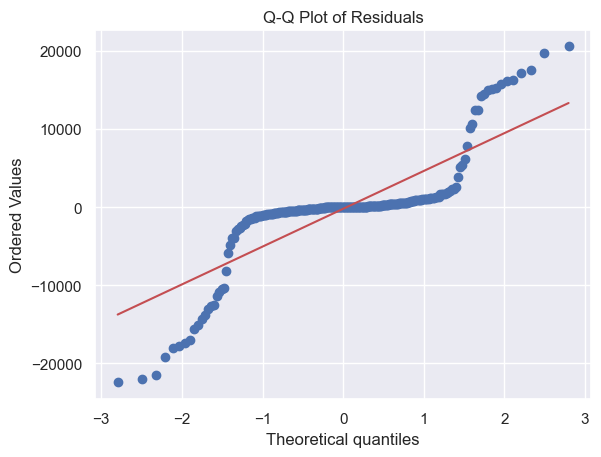

In [135]:
stats.probplot(tree_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### INTERPRETATION AND EXPLANATION USING SHAP VALUES

In [136]:
explainer = shap.TreeExplainer(tree_model)

In [137]:
shap_values = explainer(x_test)

In [138]:
np.shape(shap_values)

(268, 11)

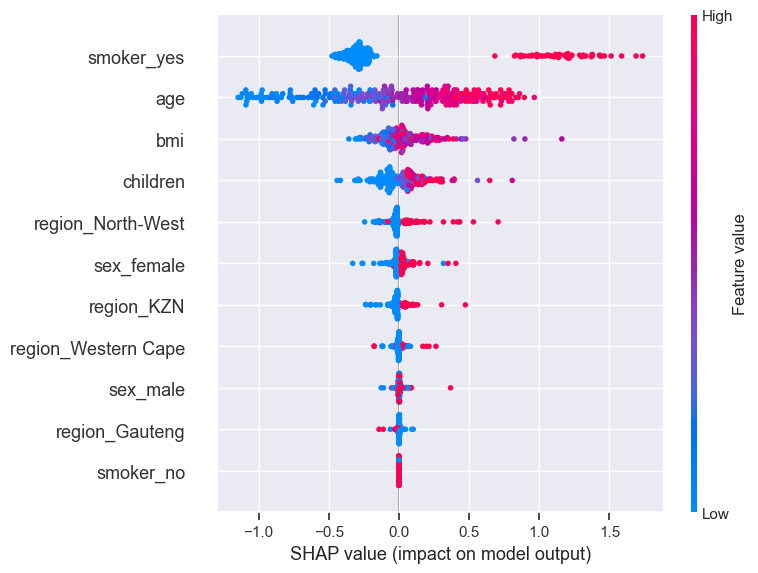

In [139]:
shap.summary_plot(shap_values,x_test)

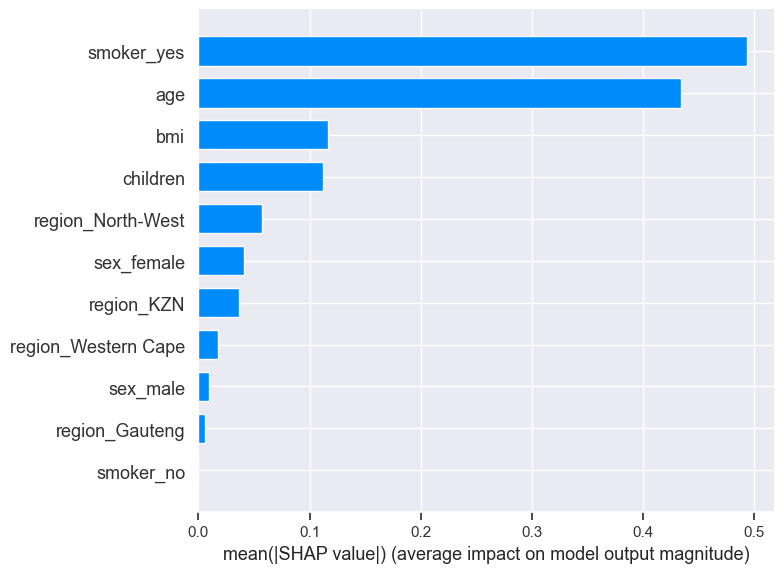

In [140]:
shap.summary_plot(shap_values, x_test, plot_type="bar") 


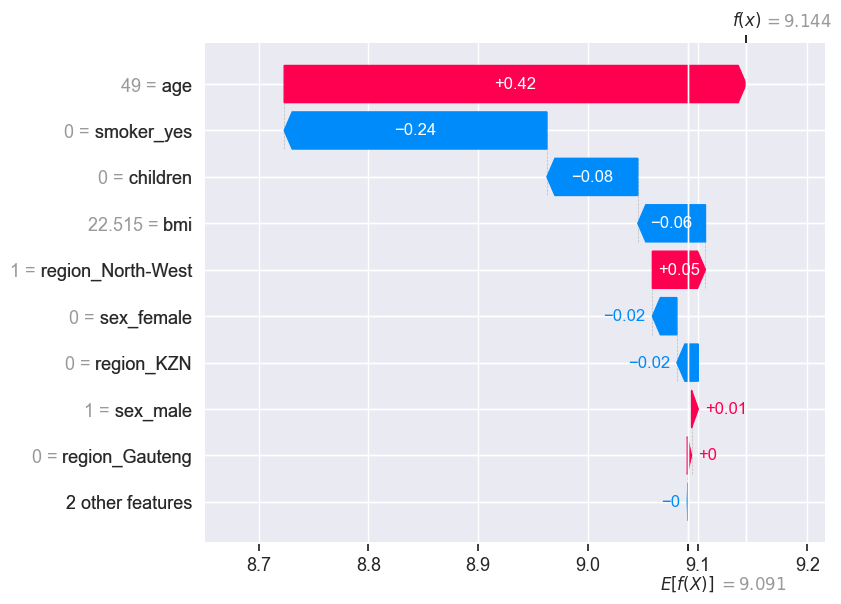

In [141]:
shap.waterfall_plot(shap_values[0])

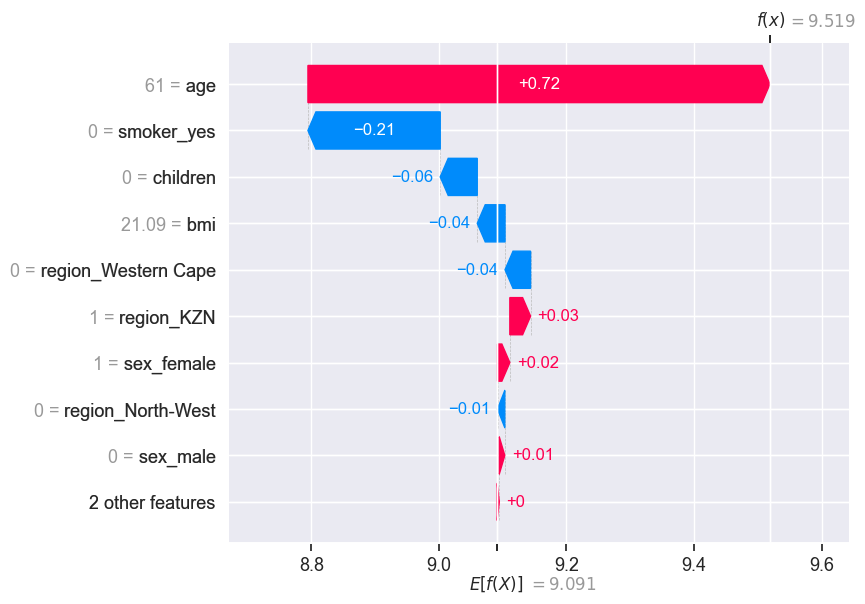

In [142]:
shap.waterfall_plot(shap_values[10])

In [143]:
shap.plots.force(shap_values[1])


In [144]:
shap.plots.force(shap_values[5])
